# EDA: Fetal Health CTG dataset


**Context:** Exploratory analysis of the *fetal_health.csv* dataset (CTG features) to understand
distributions, correlations, and target balance in support of a 3-hour class on Linear Regression,
Logistic Regression, and Multilayer Perceptrons applied to fetal health prediction.

**Data source:** Provided CSV with 2,126 rows and 22 columns (21 features + target 'fetal_health').

> NOTE: Plots use Matplotlib exclusively for portability.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
current_path = os.getcwd()
print(current_path)

df = pd.read_csv("/home/sylph/Data_Cantatio/pablocaicedor.github.io/presentaciones/ASIM/data/Fetal Health Classification/fetal_health.csv")
print(df.shape)
df.head()

/home/sylph/Data_Cantatio/pablocaicedor.github.io
(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Basic descriptive statistics

In [6]:
desc = df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Target distribution (`fetal_health`)

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


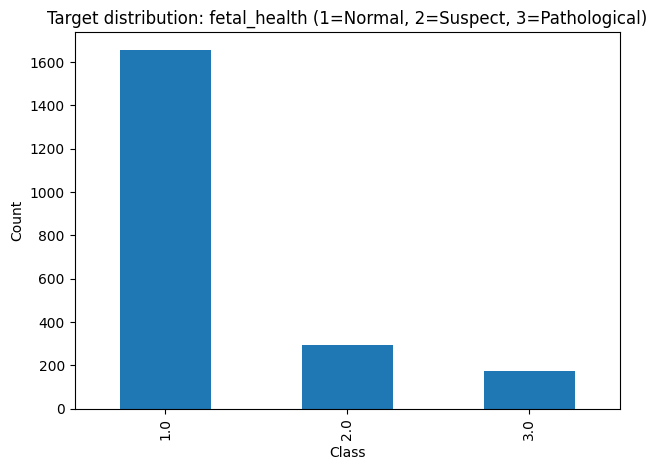

In [7]:
counts = df['fetal_health'].value_counts().sort_index()
print(counts)
plt.figure()
counts.plot(kind='bar')
plt.title('Target distribution: fetal_health (1=Normal, 2=Suspect, 3=Pathological)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Histograms of selected features

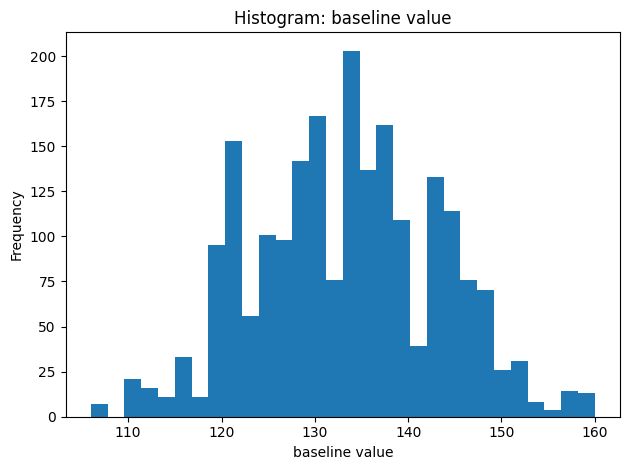

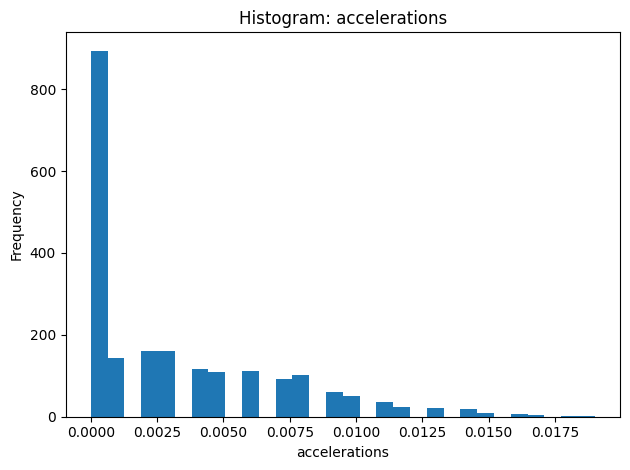

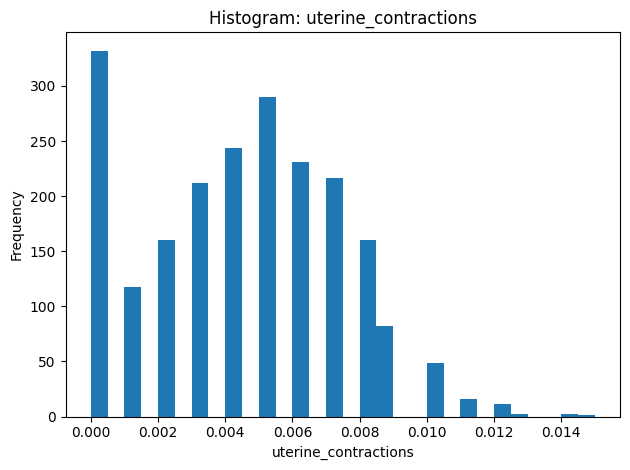

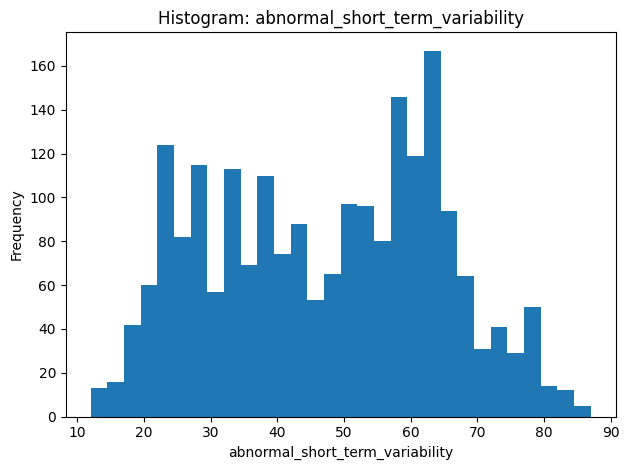

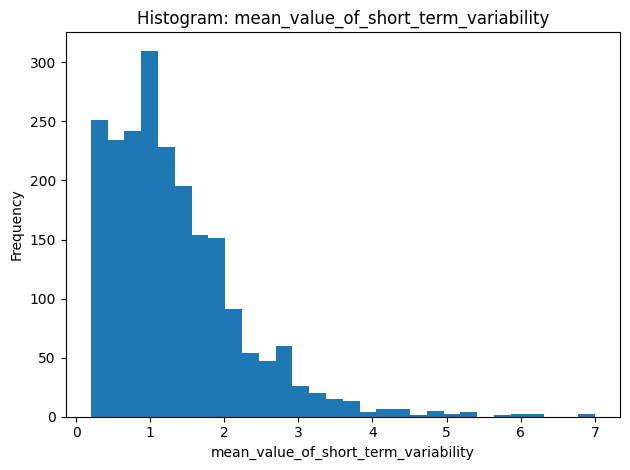

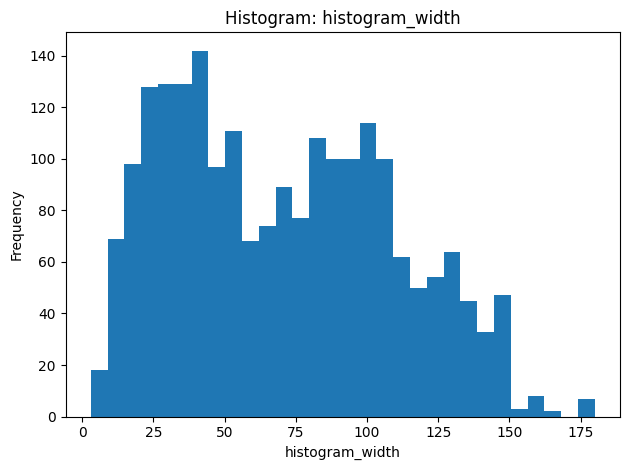

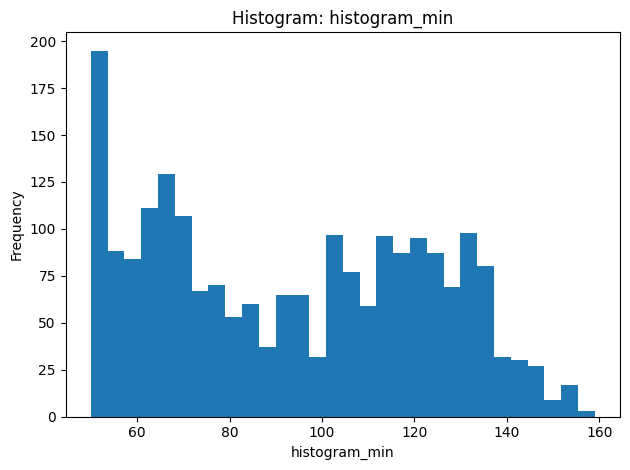

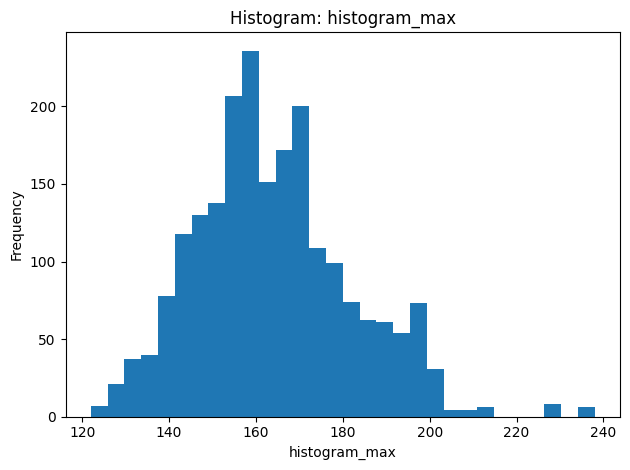

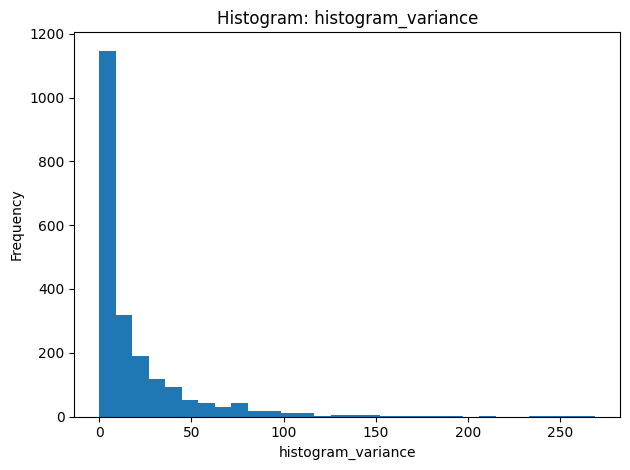

In [8]:
features = ['baseline value','accelerations','uterine_contractions',
            'abnormal_short_term_variability','mean_value_of_short_term_variability',
            'histogram_width','histogram_min','histogram_max','histogram_variance']
for col in features:
    plt.figure()
    plt.hist(df[col].dropna().values, bins=30)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Correlation matrix (Pearson)

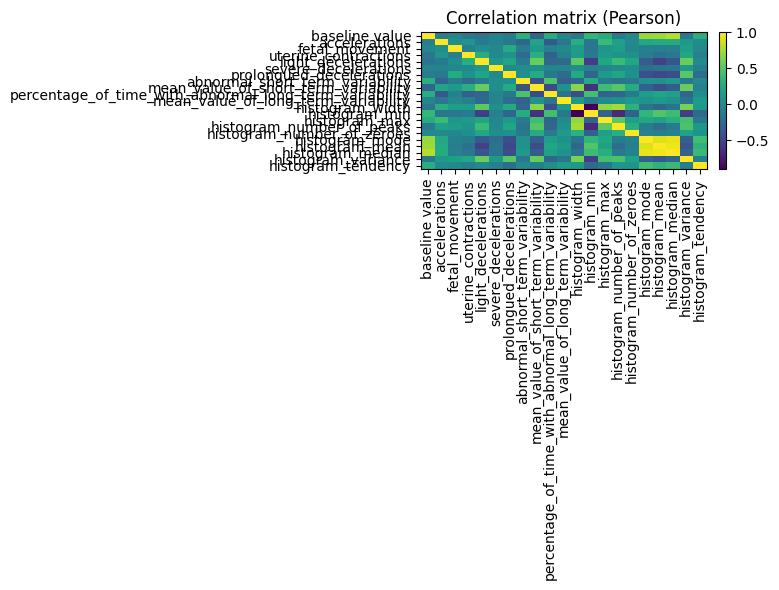

In [9]:
corr = df.drop(columns=['fetal_health']).corr(method='pearson')
plt.figure(figsize=(8,6))
# Simple imshow heatmap without seaborn
im = plt.imshow(corr.values, aspect='auto')
plt.title('Correlation matrix (Pearson)')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

## Simple train/validation split (for later modeling)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['fetal_health']).values
y = df['fetal_health'].values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(1700, 21) (426, 21)
